In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


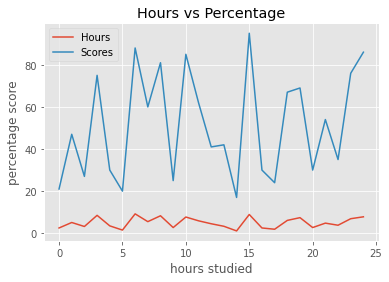

In [ ]:
# visualizing with line plot

plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours vs Percentage')
plt.xlabel('hours studied')
plt.ylabel('percentage score')
plt.show()


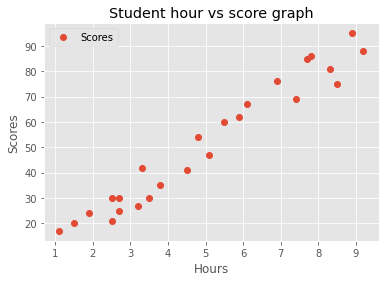

In [ ]:
df.plot(x = 'Hours' , y = 'Scores', style = 'o')
plt.title('Student hour vs score graph')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, test_size = 0.20, random_state = 0)

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
y_predict = LR.predict(x_train)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
line = regressor.coef_*x +regressor.intercept_



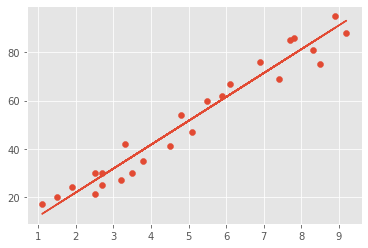

In [ ]:
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [ ]:
print('Score =', regressor.score(x_test, y_test))
print('Train Score =', regressor.score(x_test, y_test))

Score = 0.9454906892105354
Train Score = 0.9454906892105354


In [ ]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
y_test

array([20, 27, 69, 30, 62])

In [ ]:
print('A student studying for 9.25 hours a day would score: ',regressor.predict([[9.25]]))

A student studying for 9.25 hours a day would score:  [93.69173249]


In [ ]:
#using metrics to solve mean absolute error and r2 to see the accuracy 

from sklearn import metrics
from sklearn.metrics import r2_score

y_predict = regressor.predict(x_test)
print('mean absolute error: {}'.format(metrics.mean_absolute_error(y_predict, y_test)))
print('R2-score: %.2f'% r2_score(y_predict, y_test))

mean absolute error: 4.183859899002982
R2-score: 0.95


In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
